# Understanding Seaborn

Let's take a deep dive on the various plots that we can make using seaborn and see how to effectively use them

### About the Dataset: 

I'll work with dataset about **Breast Cancer Wisconsin** which is available on [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).

**Attribute Information**:

- ID number
- Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter^2 / area - 1.0) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

---
## Loading Libraries and Import Data


`%matplotlib inline` - This tells that all plots of matplot lib is to be made in the jupyter browser and not as image file

In [1]:
import pandas as pd # data processing, csv file
import numpy as np  # linear algebra
import matplotlib.pyplot as plt
import time

%matplotlib inline

dataset = pd.read_csv('datasets/data.csv')

<h2 align=center> Exploratory Data Analysis </h2>

---

In [2]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# feature names as a list
col = dataset.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [4]:
print("Dataset : {}".format(dataset.shape))

Dataset : (569, 33)


In [5]:
# y includes our labels and x includes our features
y = dataset.diagnosis                          # M or B 

# dropping unwanted columns (id, diagnosis, Unnamed: 32)

#axis = 1 (as we are dropping columns)
#axis = 0 (if we want to drop rows)
x = dataset.drop(['id', 'diagnosis', 'Unnamed: 32'], axis = 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


---
## Seaborn Library

Let's import the Seaborn library to get started.


In [6]:
import seaborn as sns # data visualization library

In [7]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Count Plot

Count plots are a great tool to desribe categorical information. For example, in this dataset we could see how the target is distributed in Benign and Malignant Cancer.

Number of Benign:  357
Number of Malignant :  212


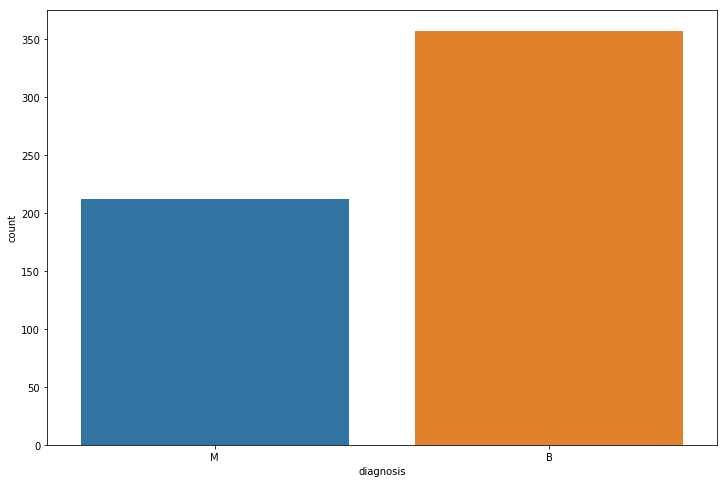

In [8]:
plt.figure(figsize = (12, 8))

sns.countplot(y, label = "Cancer")

B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

We can see how it already calculates each column value and presents it as a bar. However, the plot does not tell what the actual values are. Let's plot them and see.

Text(0, 0.5, 'Number of cases')

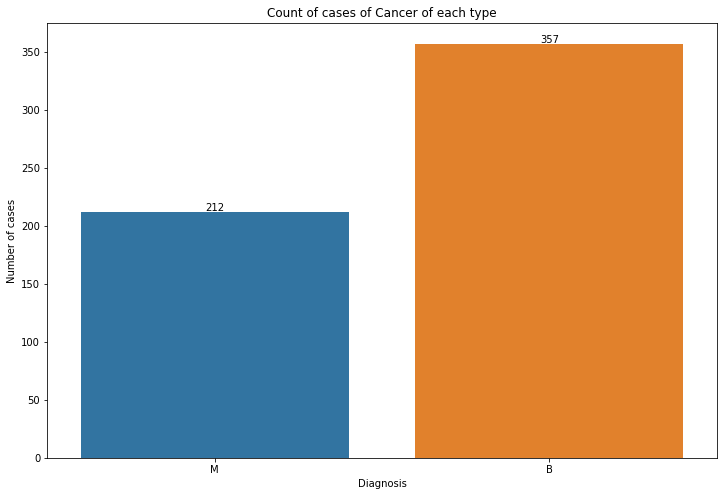

In [9]:
plt.figure(figsize = (12, 8))

# Seaborn Counterplot
cancer_type_plot = sns.countplot(y)

# Prints the no of cases at teh top and in the middle of each bar
for i in cancer_type_plot.patches:
    cancer_type_plot.annotate(i.get_height(), 
                        (i.get_x() + i.get_width() / 2.0, 
                         i.get_height()), 
                        ha = 'center', 
                        va = 'center',
                        xytext = (0, 4),
                        textcoords = 'offset points')

# Setting labels
plt.title("Count of cases of Cancer of each type")
plt.xlabel("Diagnosis")
plt.ylabel("Number of cases")



Well, now the plot looks so much better than before and even makes each bar more descriptive.


### Histograms

Histograms look similar to bar plots but they are used to express continuous values into separate bins.

The good thing about seaborn is that it has the density plot built into the histogram and is called the dist plot.

Text(0, 0.5, 'Value')

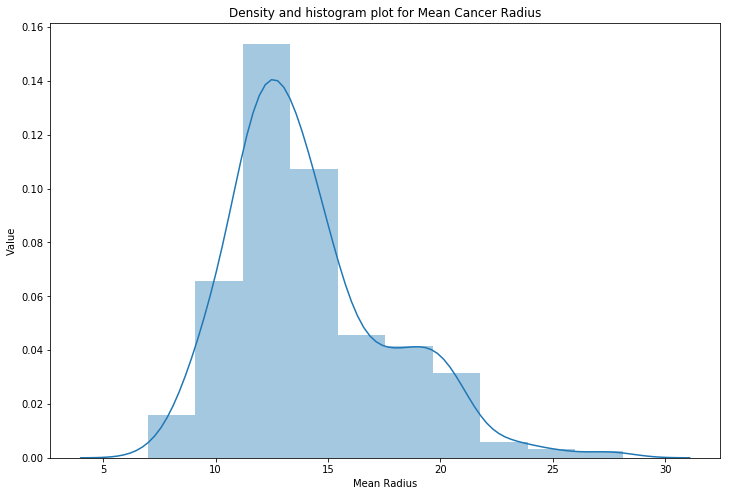

In [10]:
plt.figure(figsize = (12, 8))

sns.distplot(a = dataset['radius_mean'], bins = 10, hist = True)
plt.title("Density and histogram plot for Mean Cancer Radius")
plt.xlabel("Mean Radius")
plt.ylabel("Value")

<h2 align=center> Data Visualization </h2>

---

### Violin Plot

Great for visualizing distributions

Used to plot numeric data

Violin plots are similar to box plots but take into account the probability densities of data at different values.

Before using these plots we have to standardize our data (i.e. make sure that no columns have hugely different ranges)

Because if the numeric data have very different ranges its gonna impact our model and give higher weights to columns with higher values potentially negatively impacting our predicted model

Here we can see that area_mean and smoothness_mean have hugely different range of values 

Therefore we have to standarize our data before plotting voilin plots

In [11]:
# data.std() - standard deviation of the data
# data_std - standardized dataset

data = x
data_std = (data - data.mean())/data.std()

In [12]:
# Since our data contains 30 features(i.e. 30 columns). 
# Therefore, plotting it on screen all at once will make our data untidy. 
# So we can concat target vector with features and group it into 3 groups of 10 features each

# axis = 1 ( Tells that these are columns)
# first colon is for rows (i.e. we want all teh rows )
# second colon if for columns (i.e. we want only 10 columns)

data = pd.concat([y , data_std.iloc[:, 0:10]], axis = 1) # First 10 features



In [13]:
# Now our data froma is in long format and we have to convert it onto wide format to plot violin plots
# (Otherwise it will give an error)

data = pd.melt(data, id_vars='diagnosis',
              var_name='features',
              value_name='value')

Plotting Violin Plots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

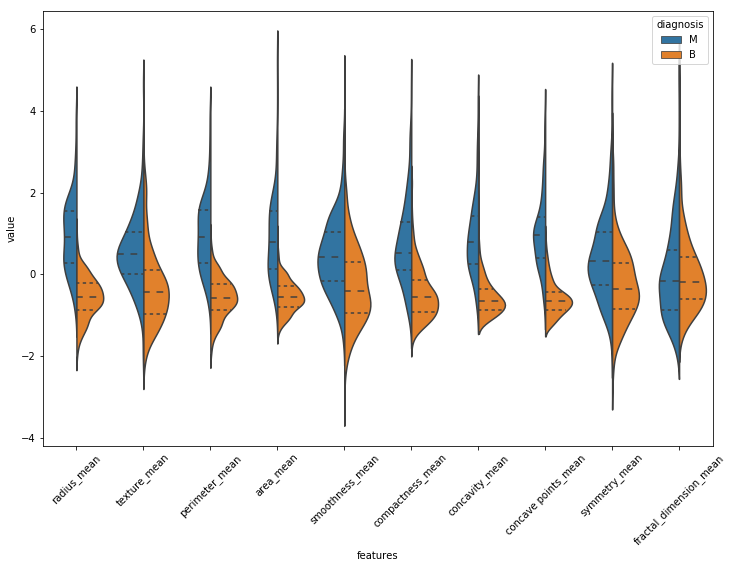

In [14]:
plt.figure(figsize = (12, 8))

# hue - to color the plot according to specific variable
sns.violinplot(x = 'features',
               y='value', hue='diagnosis', data=data,
              split=True, inner='quart')

# xticks - names on x-axis

plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

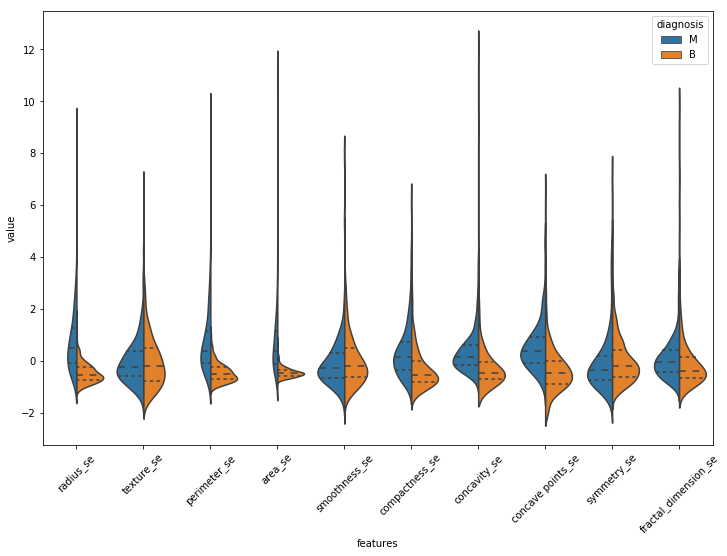

In [15]:
# Next 10 features

plt.figure(figsize = (12, 8))

data = pd.concat([y , data_std.iloc[:, 10:20]], axis = 1)

# Now our data froma is in long format and we have to convert it onto wide format to plot violin plots
# (Otherwise it will give an error)
data = pd.melt(data, id_vars='diagnosis',
              var_name='features',
              value_name='value')

# hue - to color the plot according to specific variable
sns.violinplot(x = 'features',
               y='value', hue='diagnosis', data=data,
              split=True, inner='quart')

# xticks - names on x-axis

plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

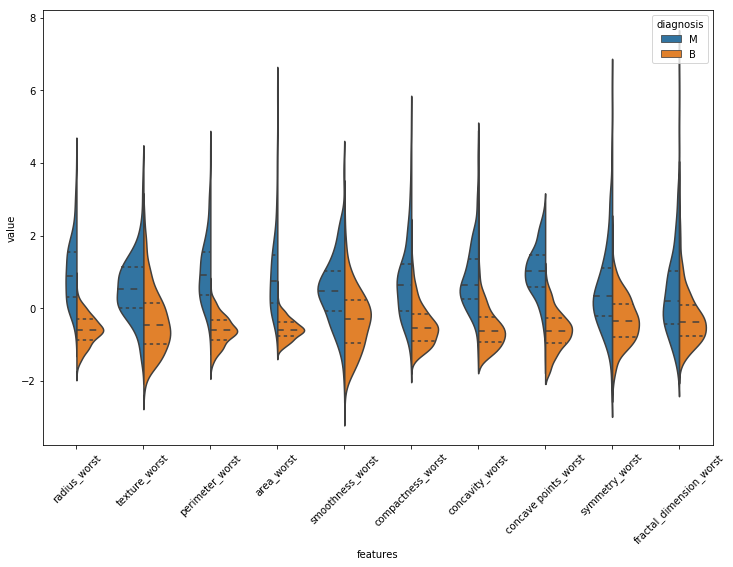

In [16]:
#Last 10 features

plt.figure(figsize = (12, 8))

data = pd.concat([y , data_std.iloc[:, 20:30]], axis = 1)

# Now our data froma is in long format and we have to convert it onto wide format to plot violin plots
# (Otherwise it will give an error)
data = pd.melt(data, id_vars='diagnosis',
              var_name='features',
              value_name='value')

# hue - to color the plot according to specific variable
sns.violinplot(x = 'features',
               y='value', hue='diagnosis', data=data,
              split=True, inner='quart')

# xticks - names on x-axis

plt.xticks(rotation=45)

### Box Plots

 As an alternative of violin plot, box plot can be used
 
 Box plots are also useful in terms of seeing outliers

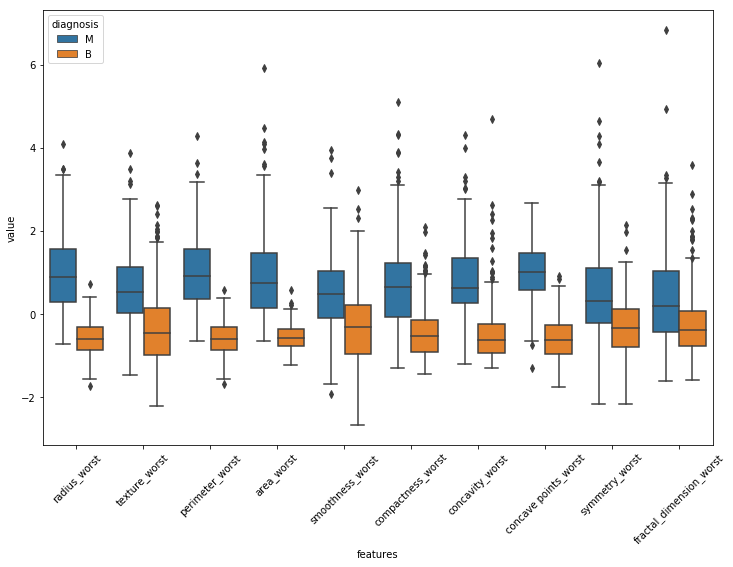

In [17]:
plt.figure(figsize = (12, 8))

sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=45);

### Scatter Plots


A scatter plot helps describe a good relation between two quanities. Here, let's see the relation between the concavity_worst and the concave points_worst feature.

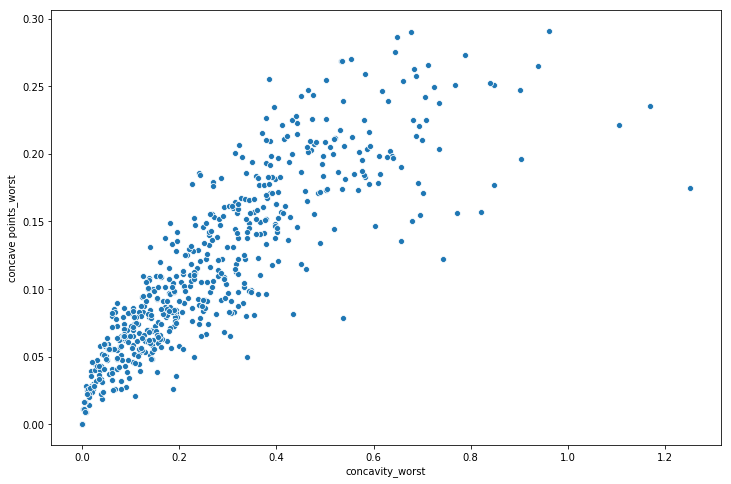

In [18]:
plt.figure(figsize = (12, 8))

sns.scatterplot(x = 'concavity_worst', y = 'concave points_worst', data = dataset)

We can see an almost linear relationship between concavity_worst and concave points_worst. 

### Joint Plots

A joint plot is a scatter plot with next level skills. It shows us the distribution of the two values we're plotting along with the scatter plot. Furthermore, it has a built in regression, which shows a regression line on the data.

Text(27.125, 0.5, 'concave points_worst')

<Figure size 864x576 with 0 Axes>

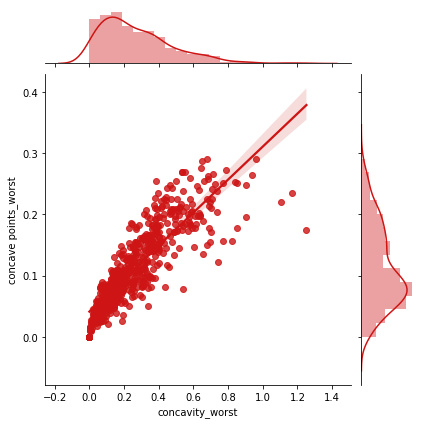

In [19]:
plt.figure(figsize = (12, 8))

sns.jointplot(x.loc[:,'concavity_worst'],
              x.loc[:,'concave points_worst'],
              kind="regg",
              color="#ce1414")
plt.xlabel("concavity_worst")
plt.ylabel("concave points_worst")

### Pair Plot

The pairplot is a unique plot provided in seaborn. When we show a pairplot for the whole dataset, it plots the relation between each column as a scatter plot and a histogram for each column's relation with itself. It's really great to showcase a lot of information in a single collection of plots.

In [20]:
# sns.pairplot(dataset)

### Pair Grid

<Figure size 864x576 with 0 Axes>

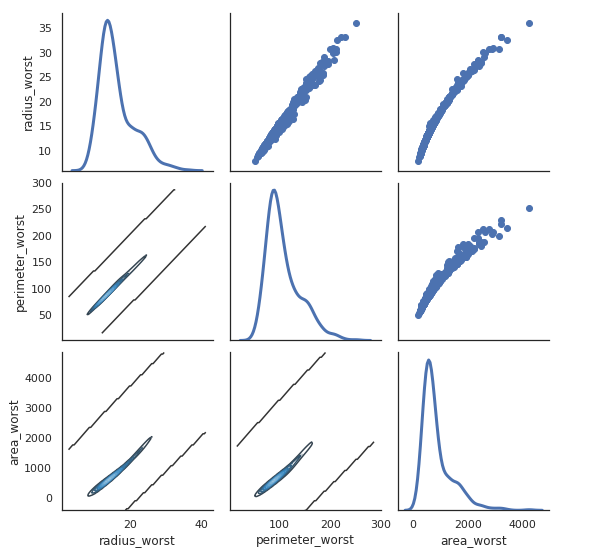

In [21]:
plt.figure(figsize = (12, 8))

sns.set(style="white")

df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)

g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

### Observing the Distribution of Values and their Variance with Swarm Plots

Swarn Plot plots non overlapping points, which helps us in visualizing how the data is spread 

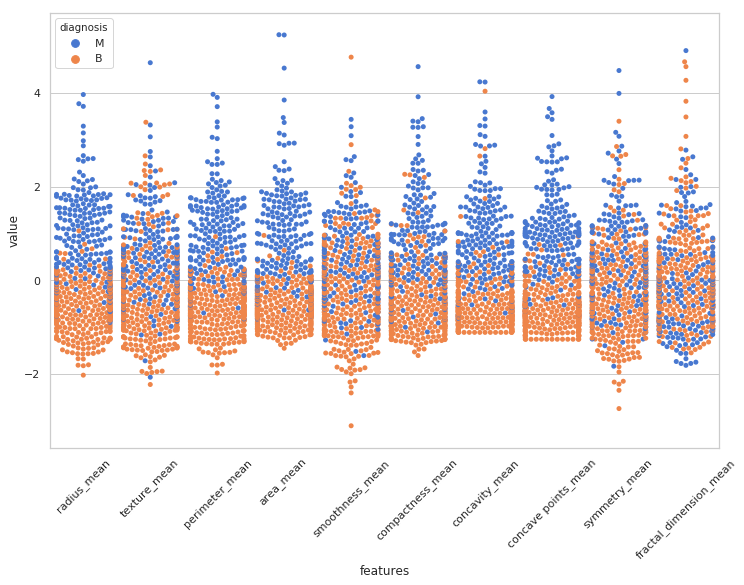

In [22]:
plt.figure(figsize=(12,8))

sns.set(style="whitegrid", palette="muted")
data = x
data_std = (data - data.mean()) / (data.std())              # standardization


# Plotting first 10 data features 
data = pd.concat([y,data_std.iloc[:,0:10]],axis=1)            
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=45);

### Heat Map

Used to measure the correlation between features values

Sometimes you just need to take a look at the correlation between features and labels. In such a case, a heatmap that not onlu mentions the values but also the color based on the correlation value gives a great description. Let's try to plot the heatmap for our dataset.

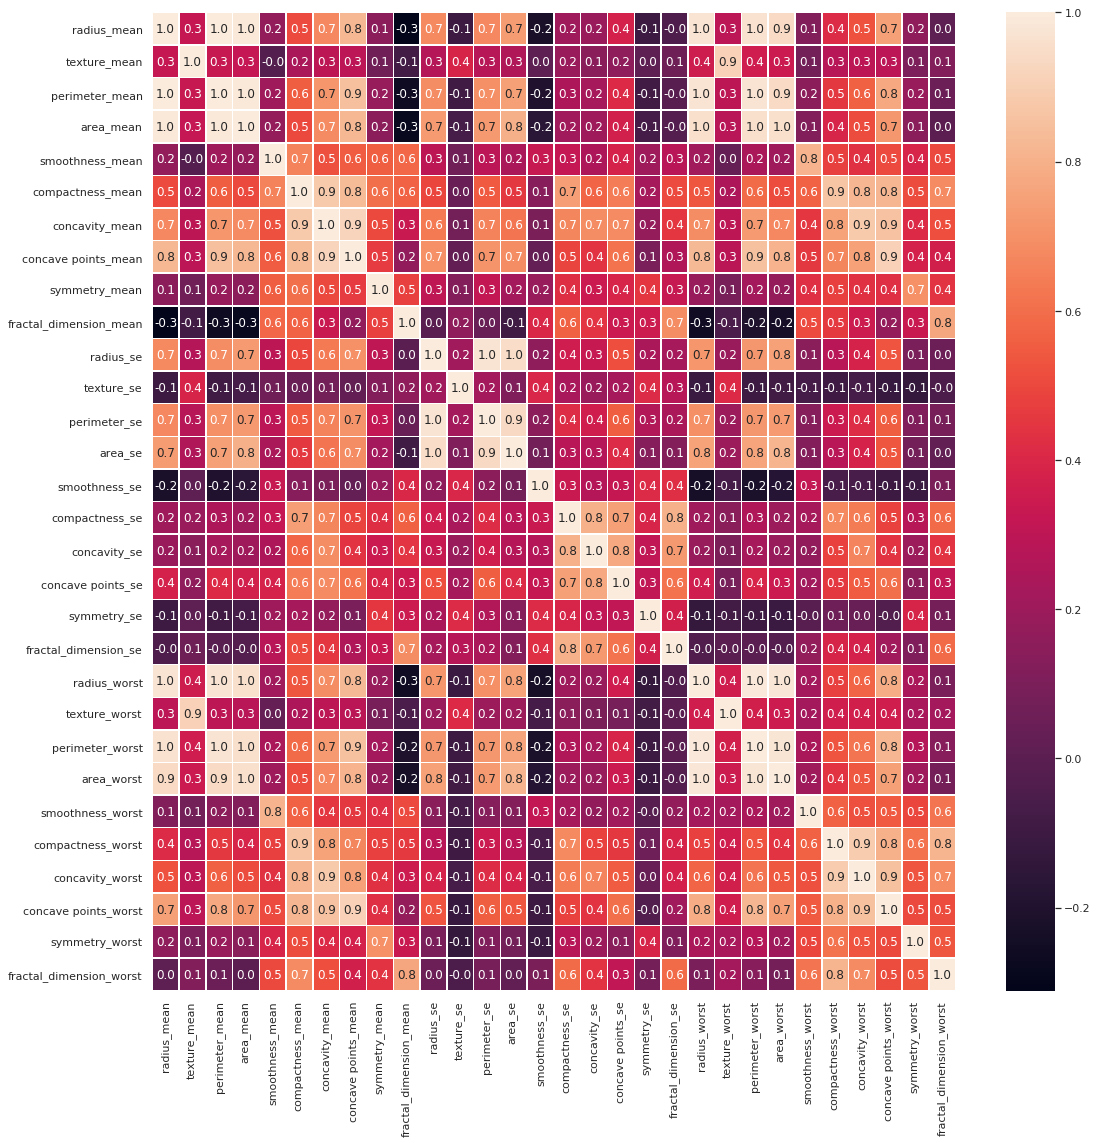

In [23]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);